# 1. Problem Definition and Planning

1. got the data from some source now i have to perform EDA and find insight of data 
and choose ML model wisly test and and deployment of model.
2. I have data in CSV for heart failure prediction 


# 2. Data Collection and Preparation 

In [1]:
#impord modules for cleaning and processing 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [2]:
data=pd.DataFrame(pd.read_csv("heart-failure-prediction.csv"))

Initial exploration

In [3]:
print("data Shape")
data.shape

data Shape


(918, 12)

In [4]:
print("10 row of data")
data.head(10)

10 row of data


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [5]:
print("data information datatypes, total values, etc... ")
data.info()

data information datatypes, total values, etc... 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
#Check duplicate row
data.duplicated().sum()

0

not null values in this data

In [7]:
print("Summary statistics")
data.describe(include='all')

Summary statistics


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000



# EDA

In [8]:
#uniques values count 
for i in data.columns:
    if data[i].dtype==object:
        print(f"*****{i}****\n{data[i].value_counts()}")
        

*****Sex****
M    725
F    193
Name: Sex, dtype: int64
*****ChestPainType****
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
*****RestingECG****
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
*****ExerciseAngina****
N    547
Y    371
Name: ExerciseAngina, dtype: int64
*****ST_Slope****
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


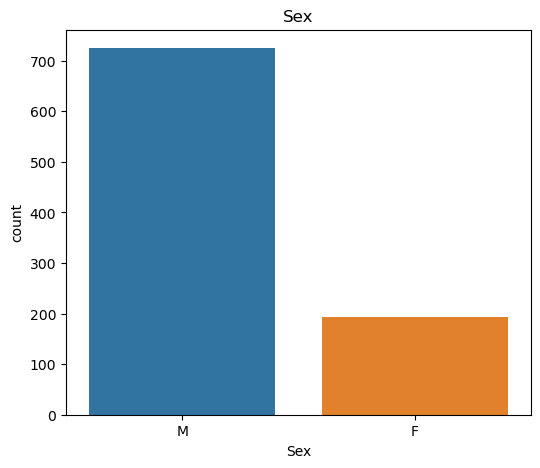

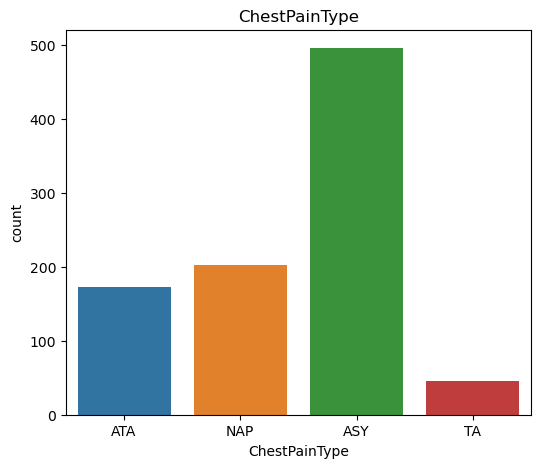

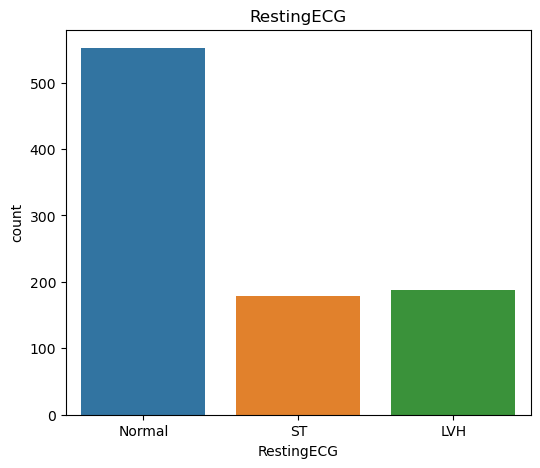

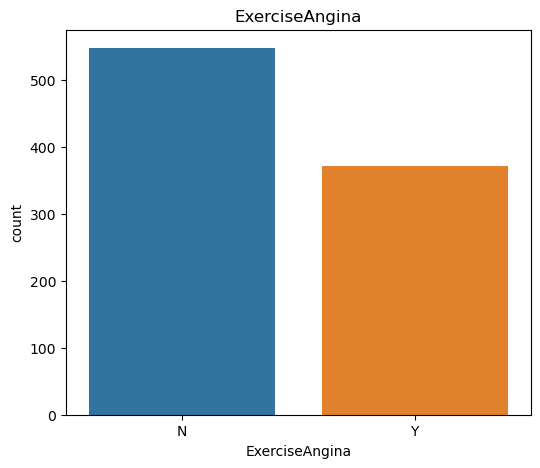

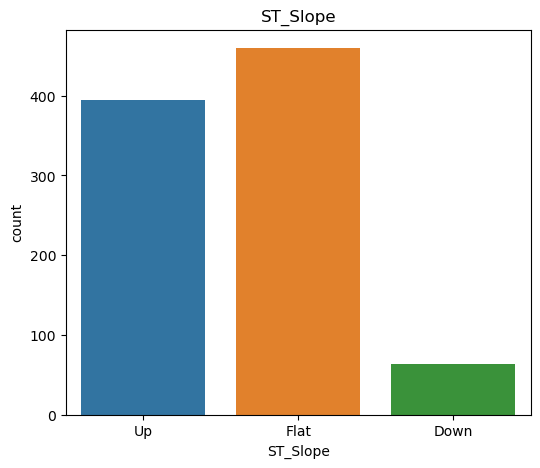

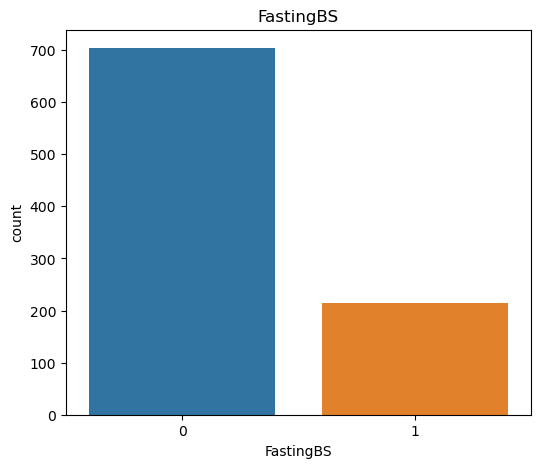

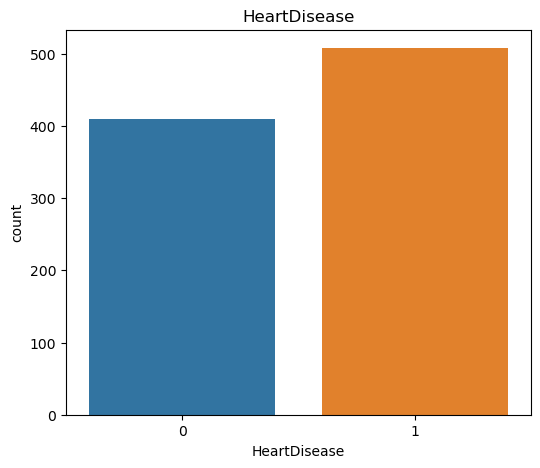

In [9]:
#univariate analysis
cat_colum=["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope","FastingBS","HeartDisease"]
for i in cat_colum:
    plt.figure(figsize=(6,5))
    sns.countplot(x=i,data=data)
    plt.title(i)
    plt.show()

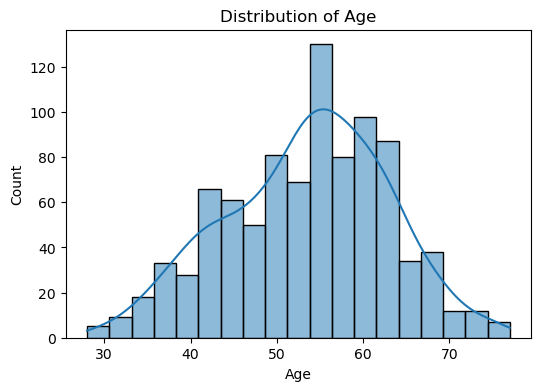

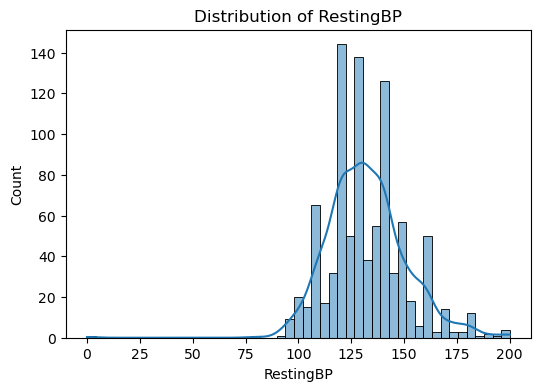

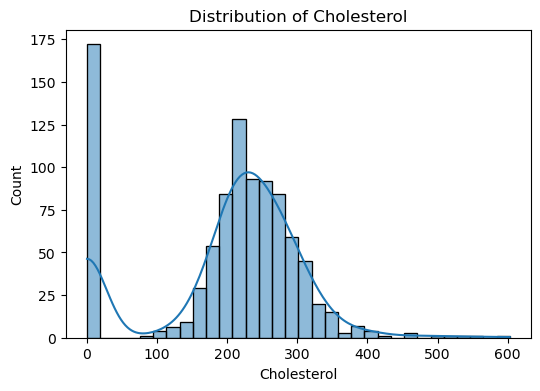

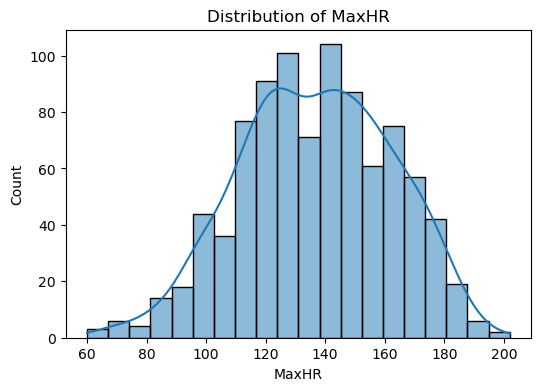

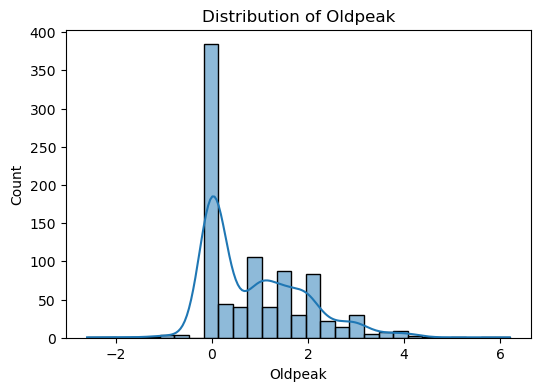

In [10]:
num_col = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for i in num_col:
    plt.figure(figsize=(6,4))
    sns.histplot(data[i], kde=True)
    plt.title(f'Distribution of {i}')
    plt.show()


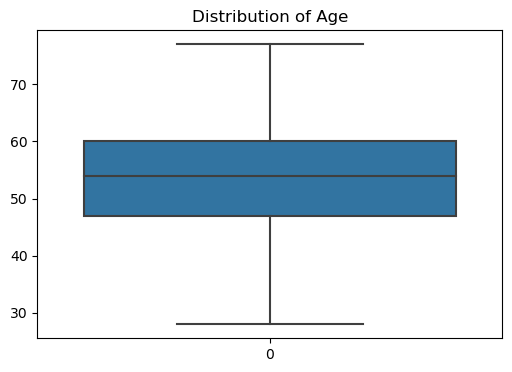

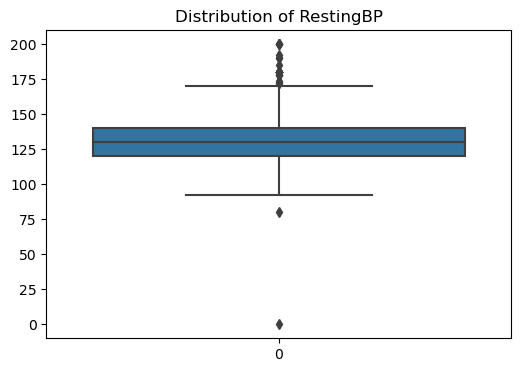

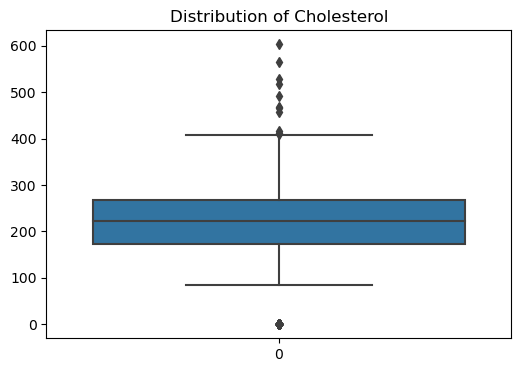

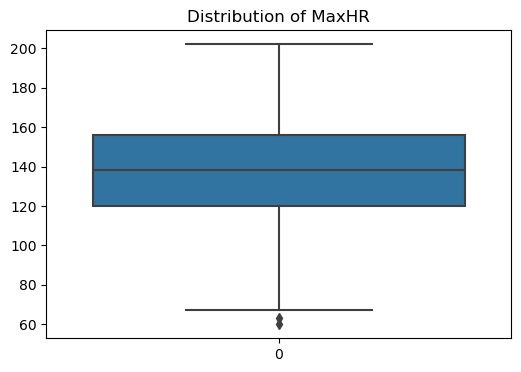

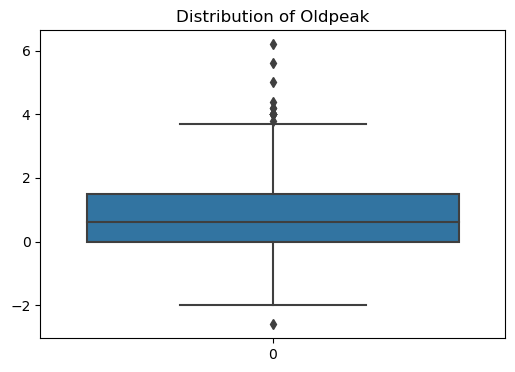

In [11]:
for i in num_col:
    plt.figure(figsize=(6,4))
    sns.boxplot(data[i])
    plt.title(f'Distribution of {i}')
    plt.show()

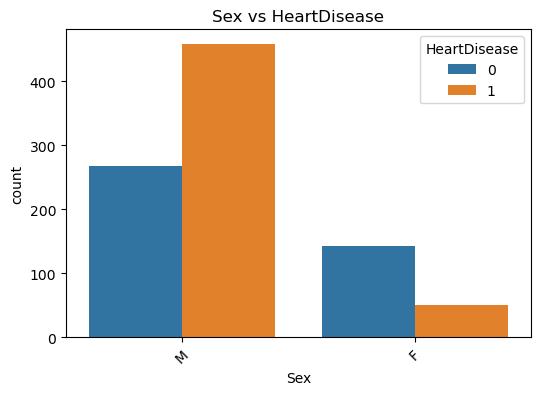

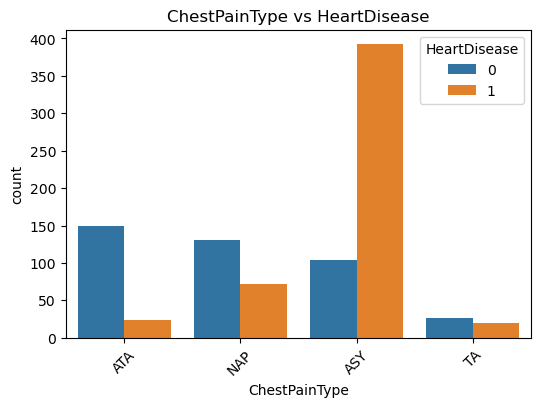

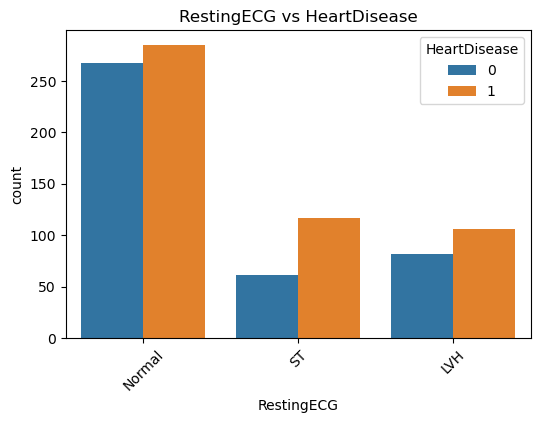

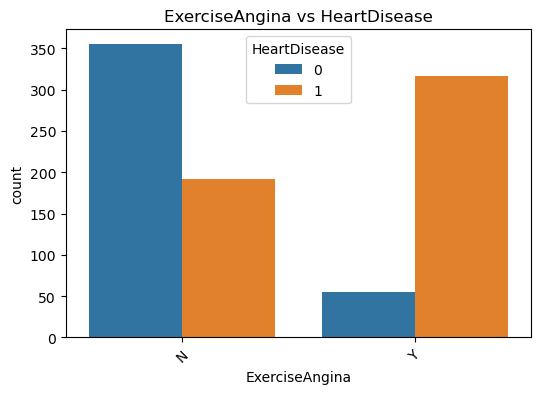

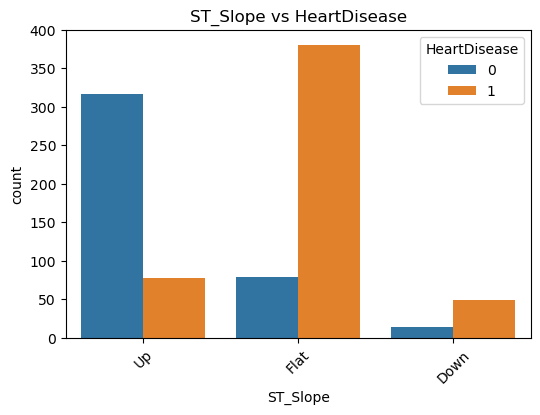

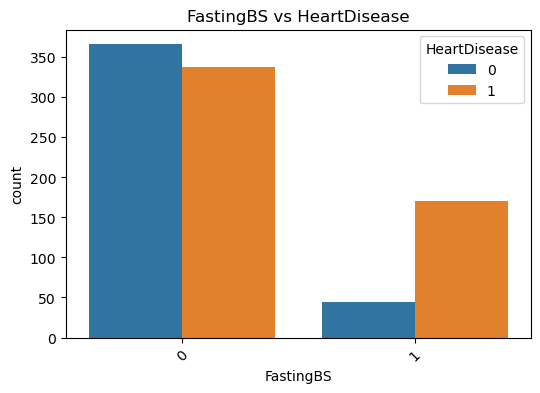

In [12]:
#bivariate analysis
for i in cat_colum[:-1]:
    plt.figure(figsize=(6,4))
    sns.countplot(x=i, hue='HeartDisease', data=data)
    plt.title(f'{i} vs HeartDisease')
    plt.xticks(rotation=45)
    plt.show()

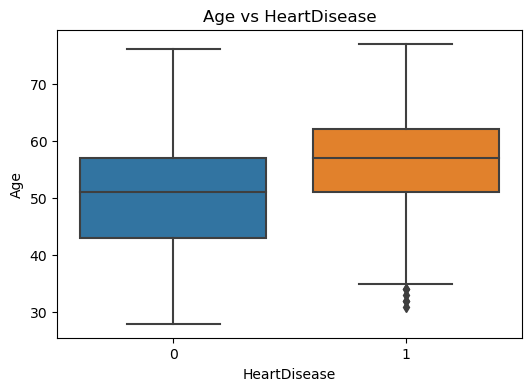

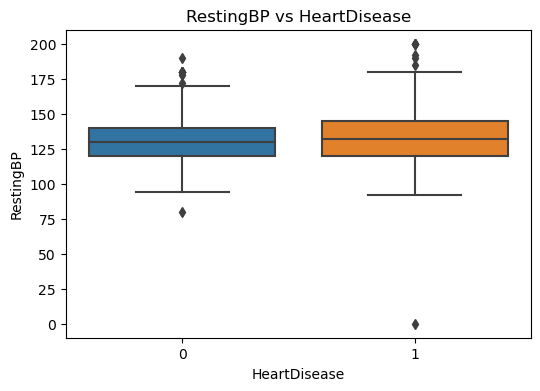

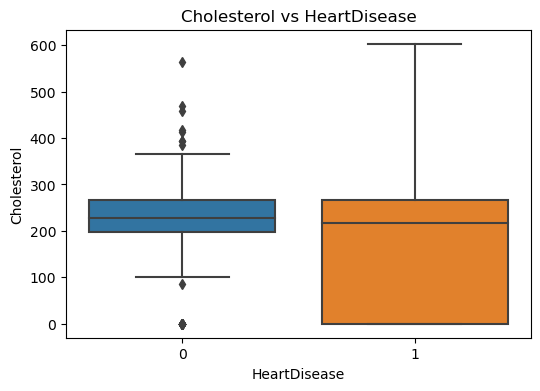

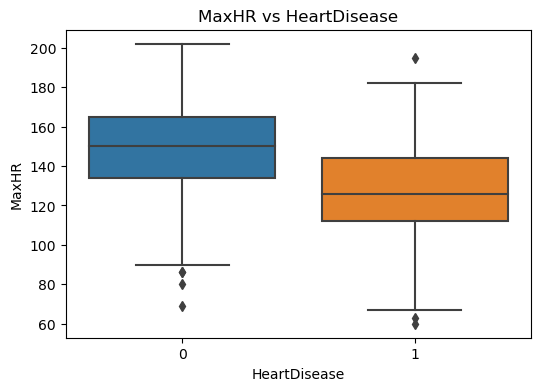

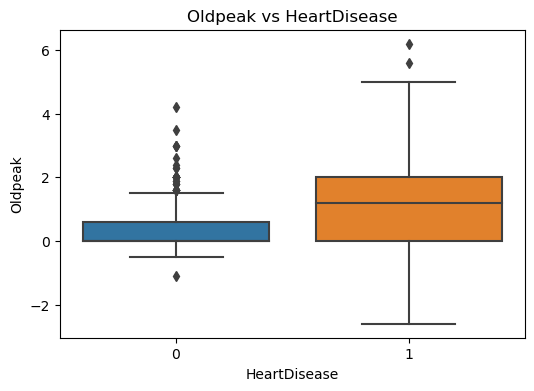

In [13]:
for i in num_col:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='HeartDisease', y=i, data=data)
    plt.title(f'{i} vs HeartDisease')
    plt.show()


In [14]:
print(data[(data["Cholesterol"] == 0) & (data["HeartDisease"] == 1)].shape[0],"with Heartdiseases")
print(data[(data["Cholesterol"] == 0) & (data["HeartDisease"] == 0)].shape[0],"Not Diseases")

152 with Heartdiseases
20 Not Diseases


In [15]:
#remove row where Cholesterol==0
data = data[data["Cholesterol"] != 0]

In [16]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [17]:
for i in num_col:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data = data[(data[i] >= lower) & (data[i] <= upper)]

In [18]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


<Figure size 600x400 with 0 Axes>

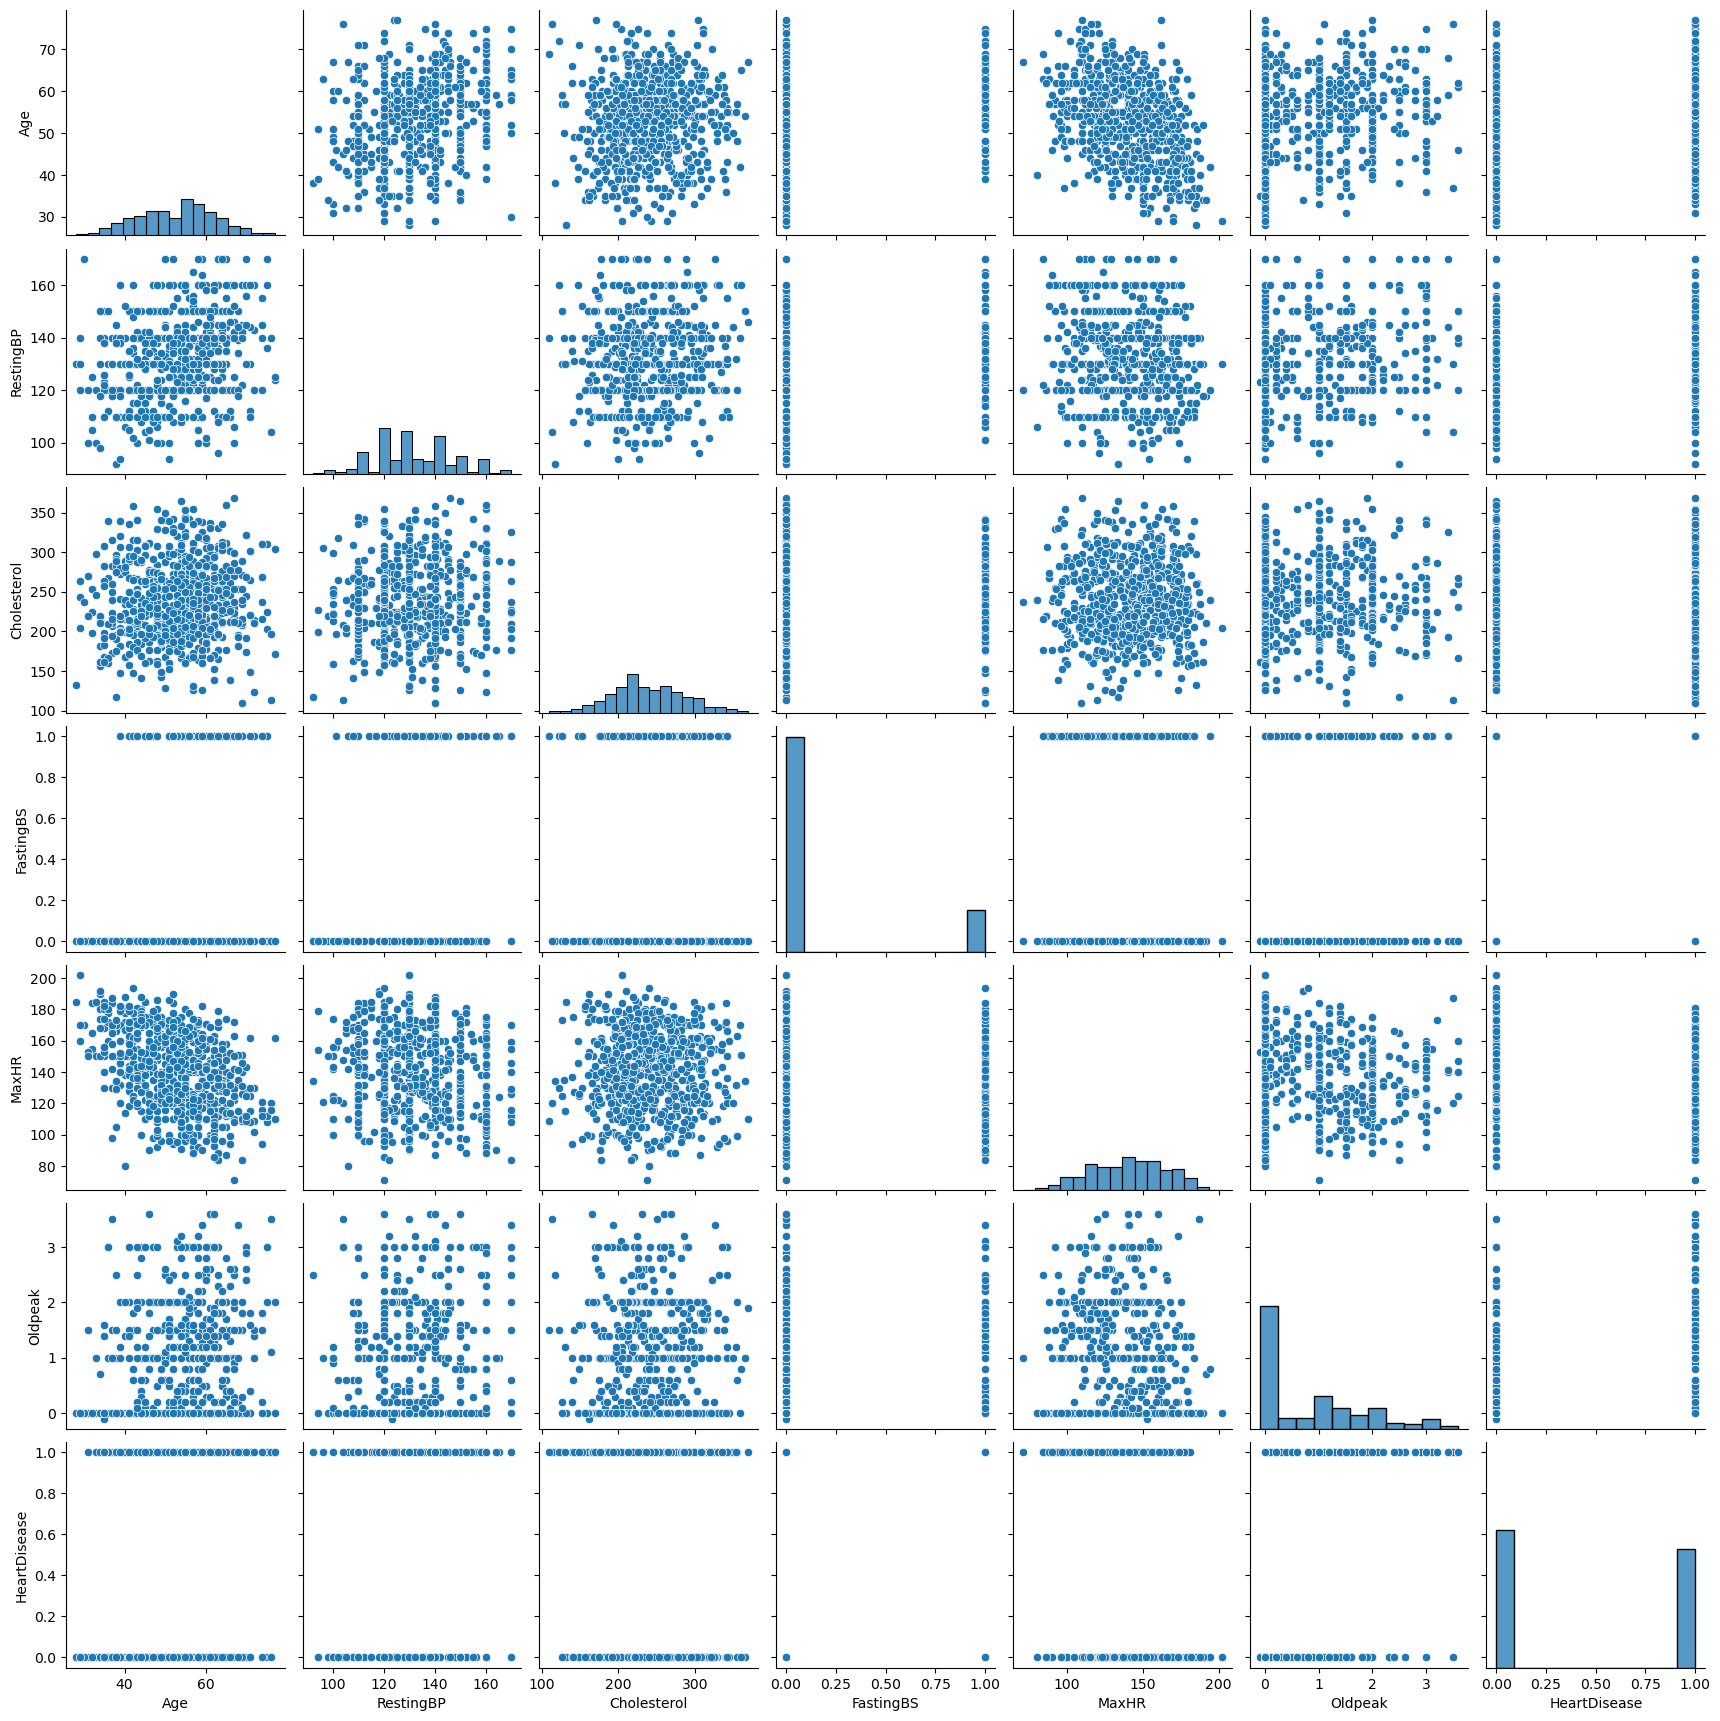

In [19]:
plt.figure(figsize=(6,4))
sns.pairplot(data)
plt.show()

In [20]:
"""df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})
df['ChestPainType'] = df['ChestPainType'].map({
    'TA': 0,
    'ATA': 1,
    'NAP': 2,
    'ASY': 3
})
df['RestingECG'] = df['RestingECG'].map({
    'Normal': 0,
    'ST': 1,
    'LVH': 2
})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N': 0, 'Y': 1})
df['ST_Slope'] = df['ST_Slope'].map({
    'Up': 0,
    'Flat': 1,
    'Down': 2
})
"""
encod_columns=["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]
encoders = {}
for i in encod_columns:
    le = LabelEncoder()
    data[i] = le.fit_transform(data[i])
    encoders[i] = le

In [21]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [22]:
encoders

{'Sex': LabelEncoder(),
 'ChestPainType': LabelEncoder(),
 'RestingECG': LabelEncoder(),
 'ExerciseAngina': LabelEncoder(),
 'ST_Slope': LabelEncoder()}

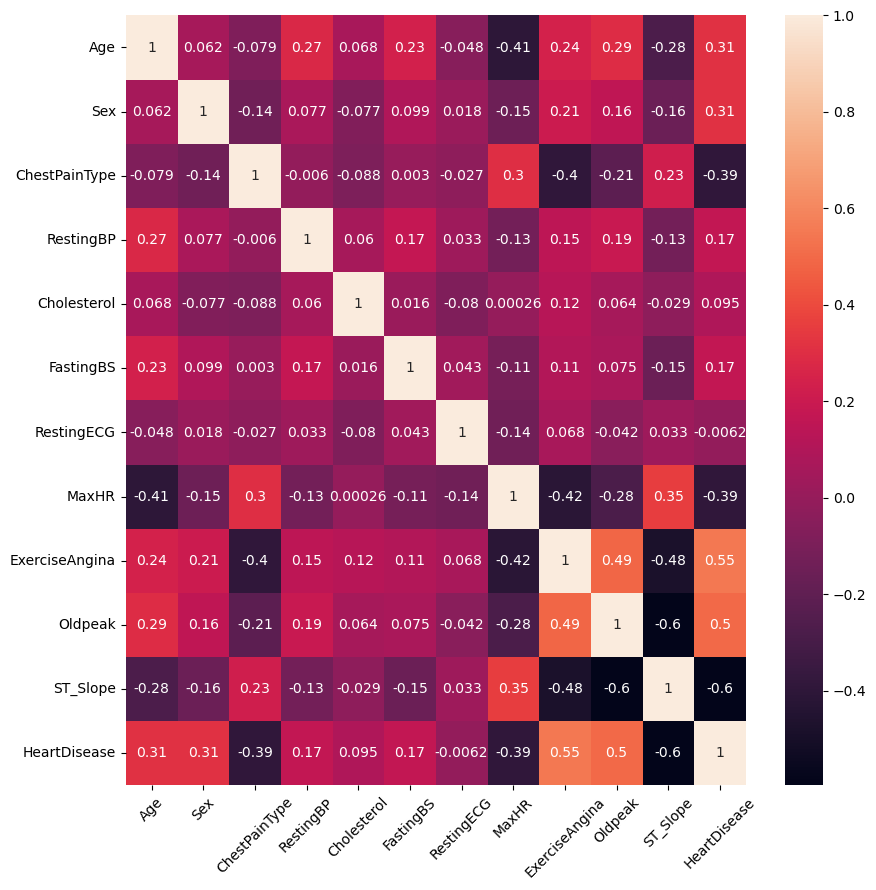

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.xticks(rotation=45)
plt.show()

In [24]:
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

Splitting the dataset

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Feature Scalling

In [26]:

"""scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)"""

'scaler=StandardScaler()\nX_train=scaler.fit_transform(X_train)\nX_test=scaler.transform(X_test)'

In [27]:
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
617,57,1,1,124,261,0,1,141,0,0.3,2
6,45,0,1,130,237,0,1,170,0,0.0,2
627,44,1,2,140,235,0,0,180,0,0.0,2
844,52,1,3,118,186,0,0,190,0,0.0,1
704,50,1,0,150,243,0,0,128,0,2.6,1
...,...,...,...,...,...,...,...,...,...,...,...
640,48,0,2,130,275,0,1,139,0,0.2,2
205,50,1,0,150,215,0,1,140,1,0.0,2
88,43,1,3,120,291,0,2,155,0,0.0,1
754,57,1,0,132,207,0,1,168,1,0.0,2


# 3. Model Selection and Training

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")


🔍 Model: Logistic Regression
Accuracy: 0.8633093525179856
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87        75
           1       0.84      0.88      0.85        64

    accuracy                           0.86       139
   macro avg       0.86      0.86      0.86       139
weighted avg       0.86      0.86      0.86       139


🔍 Model: Random Forest
Accuracy: 0.8920863309352518
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90        75
           1       0.87      0.91      0.89        64

    accuracy                           0.89       139
   macro avg       0.89      0.89      0.89       139
weighted avg       0.89      0.89      0.89       139


🔍 Model: Decision Tree
Accuracy: 0.8057553956834532
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82        75


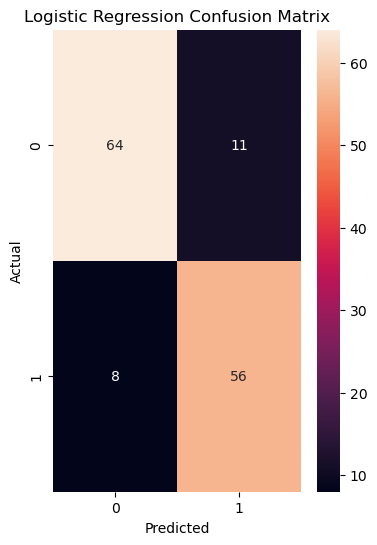

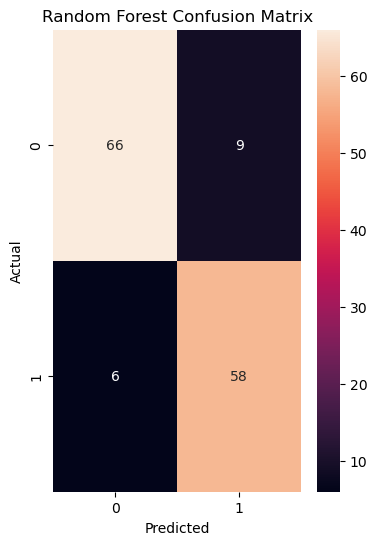

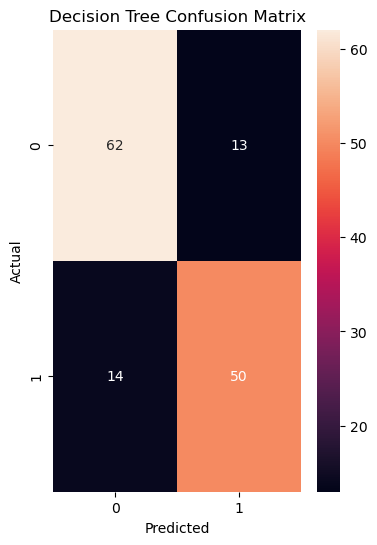

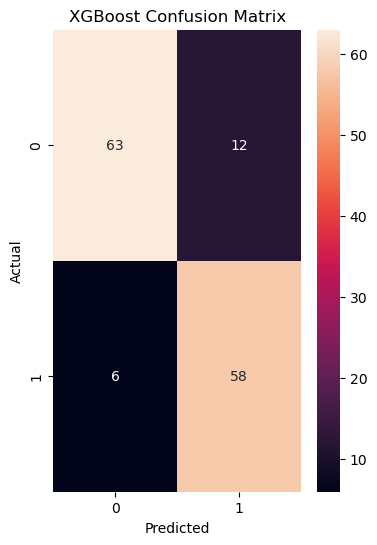

In [29]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

for name, model in models.items():
    print(f"\n🔍 Model: {name}")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    plt.figure(figsize=(4, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best CV Accuracy: 0.8589516789516789
Test Accuracy: 0.8633093525179856
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87        75
           1       0.83      0.89      0.86        64

    accuracy                           0.86       139
   macro avg       0.86      0.87      0.86       139
weighted avg       0.87      0.86      0.86       139



Text(20.72222222222222, 0.5, 'Actual')

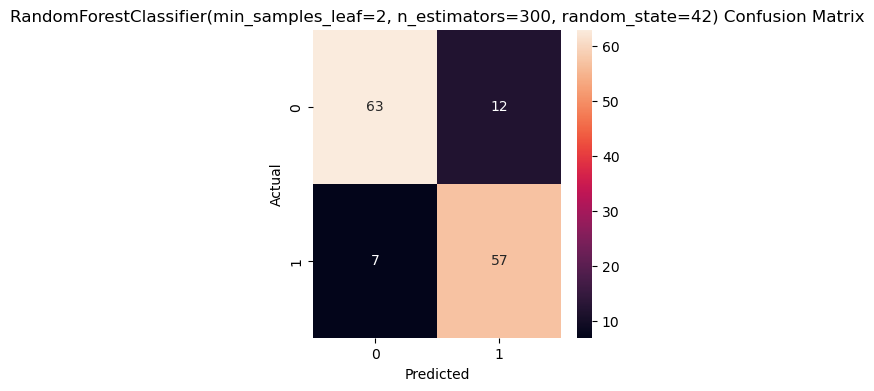

In [30]:
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
    
}

# Set up GridSearchCV
grid_search_rf= GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           n_jobs=-1,
                           verbose=2,
                           scoring='accuracy')

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search_rf.best_params_)
print("Best CV Accuracy:", grid_search_rf.best_score_)

best_params_rf= grid_search_rf.best_params_
best_model_rf= RandomForestClassifier(**best_params_rf, random_state=42)
best_model_rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = best_model_rf.predict(X_test)

# Evaluate
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True)
plt.title(f'{best_model_rf} Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')


Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best Parameters: {'C': 100, 'penalty': 'l1'}
Best CV Accuracy: 0.8444645006016847
Test Accuracy: 0.8633093525179856
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87        75
           1       0.84      0.88      0.85        64

    accuracy                           0.86       139
   macro avg       0.86      0.86      0.86       139
weighted avg       0.86      0.86      0.86       139



Text(20.72222222222222, 0.5, 'Actual')

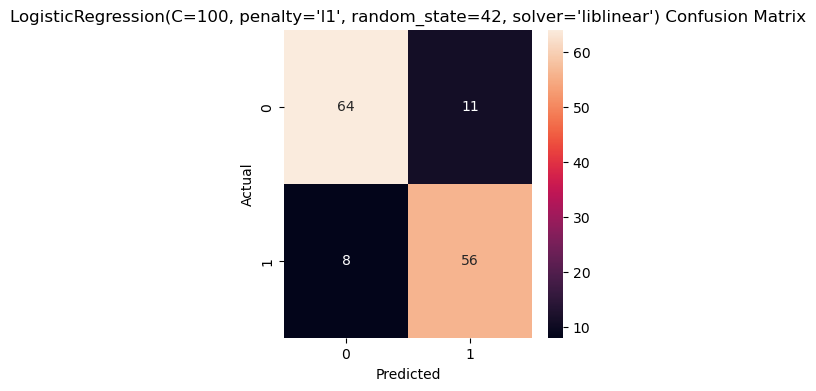

In [31]:
# Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')  # 'liblinear' works well for small datasets

# Parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],         # Regularization strength (lower C = stronger regularization)
    'penalty': ['l1', 'l2']               # L1 = Lasso, L2 = Ridge
}

# Grid search
grid_search_lr = GridSearchCV(log_reg,
                              param_grid,
                              cv=2,
                              scoring='accuracy',
                              n_jobs=-1,
                              verbose=1)

# Fit on training data
grid_search_lr.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search_lr.best_params_)
print("Best CV Accuracy:", grid_search_lr.best_score_)

best_params_lr= grid_search_lr.best_params_
best_model_lr = LogisticRegression(**best_params_lr, random_state=42, solver='liblinear')
best_model_lr.fit(X_train, y_train)

# Predict on test set
y_pred_lr = best_model_lr.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True)
plt.title(f'{best_model_lr} Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
Best CV Accuracy: 0.8662064238151195
Test Accuracy: 0.8920863309352518
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90        75
           1       0.86      0.92      0.89        64

    accuracy                           0.89       139
   macro avg       0.89      0.89      0.89       139
weighted avg       0.89      0.89      0.89       139



Text(20.72222222222222, 0.5, 'Actual')

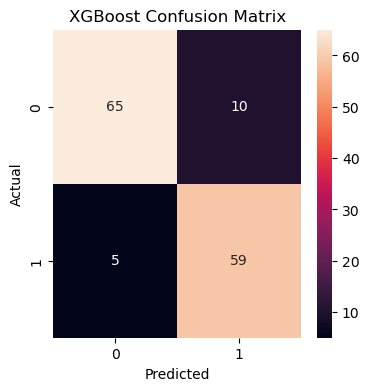

In [32]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Grid Search
grid_search_XGB = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,
                           n_jobs=-1,
                           verbose=1)

grid_search_XGB.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search_XGB.best_params_)
print("Best CV Accuracy:", grid_search_XGB.best_score_)

best_params_XGB= grid_search_XGB.best_params_
best_model_XGB = XGBClassifier(**best_params_XGB, random_state=42, use_label_encoder=False, eval_metric='logloss')
best_model_XGB.fit(X_train, y_train)

# Predict on test set
y_pred_XGB = best_model_XGB.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred_XGB))
print("Classification Report:\n", classification_report(y_test, y_pred_XGB))
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_XGB), annot=True)
plt.title(f'{name} Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Test Accuracy: 0.8920863309352518
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90        75
           1       0.87      0.91      0.89        64

    accuracy                           0.89       139
   macro avg       0.89      0.89      0.89       139
weighted avg       0.89      0.89      0.89       139



Text(20.72222222222222, 0.5, 'Actual')

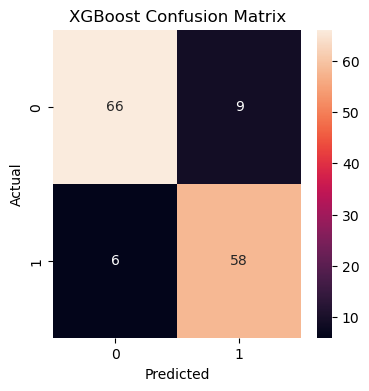

In [33]:
final_model=RandomForestClassifier(random_state=42)
final_model.fit(X_train, y_train)
y_pred=final_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.title(f'{name} Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

with different different model try gridsearchCV
RandomForestClassifier gives better output 

In [34]:
import pickle
# Save model
with open("model.pkl", "wb") as f:
    pickle.dump(final_model, f)

# Save encoders
with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)

4. Model Evaluation
5. Model Deployment and Monitoring
6. Iteration and Improvement